In [1]:
from sympy import *
import pandas as pd

In [25]:
import pickle

In [2]:
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [3]:
t, P, e_r, e_d, delta_e, rho_e, g_e, i_r, i_d, delta_i, rho_i, g_i, b = symbols('t P \\tau_{er} \\tau_{ed} \\delta_e \\rho_e \\bar{g}_e \\tau_{ir} \\tau_{id} \\delta_i \\rho_i \\bar{g}_i \\beta', positive=True, real=True)

In [4]:
estimateDict = { P: (1.9,2.1), e_r: (1.5,5), e_d: (8,20), delta_e: (0,0), rho_e: (2,7), g_e: (0.02,0.25), i_r : (1.5,5), i_d : (14,60), delta_i:(3,8), rho_i: (5,20), g_i:(0.04,0.5) , b:(0.5,5) }

In [5]:
averageEstimateDict = {key: pow(value[0]*value[1],0.5) for key,value in estimateDict.items()}

In [49]:
averageEstimateDict

In [6]:
#a,b,c,d = -t/e_r, -t/e_d, -(t - delta_i)/i_r, -(t - delta_i)/i_d

In [7]:
alpha = exp(-(t-delta_e)/e_d) - exp(-(t-delta_e)/e_r)

In [8]:
alpha_prime = alpha.diff(t)

In [9]:
theta_e = solve(alpha_prime,t) # Time to peak

In [10]:
alpha_star = simplify(alpha.subs(t, theta_e[0]).doit())

In [11]:
I_alpha_star = alpha_star.subs({ e_r:i_r, e_d: i_d})

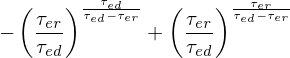

In [12]:
alpha_star

In [13]:
E = Piecewise((0, t < delta_e), (g_e * (alpha/alpha_star), True))

In [14]:
I = E.xreplace({g_e: g_i, rho_e: rho_i, e_r:i_r, e_d: i_d, delta_e: delta_i})

In [15]:
C = E - I

In [16]:
C = C.subs({delta_e:0})

In [17]:
C_check = N(C.subs(averageEstimateDict))

In [57]:
plot(C_check,(t,0,100))

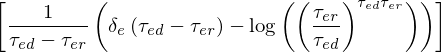

In [19]:
theta_e

In [20]:
#C_prime = ((g_e/alpha_star)*(t/e_d - t/e_r)) - ((g_i/I_alpha_star)*((t-delta_i)/i_d - (t-delta_i)/i_r))

In [37]:
a_star, ai_star = symbols('a_*, a_i*')

In [38]:
C_prime = ((g_e/a_star)*(e_d - e_r)/((t-e_d)*(t-e_r))) - ((g_i/ai_star)*(i_d - i_r)/((t-delta_i-i_d)*(t-delta_i-i_r)))

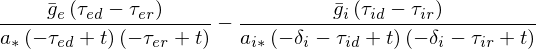

In [39]:
C_prime

In [30]:
C_prime = C_prime.subs({e_d: rho_e*e_r, i_d: rho_i*i_r, g_i: P*g_e})

In [59]:
C_prime = simplify(C_prime)

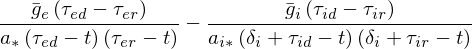

In [60]:
C_prime

In [42]:
backup = pd.HDFStore('variables.h5')
solution = solveset(C_prime,t)
backup['solution'] = solution
backup.close()

TypeError: cannot properly create the storer for: [_TYPE_MAP] [group->/solution (Group) '',value-><class 'sympy.sets.sets.Complement'>,format->fixed,append->False,kwargs->{'encoding': None}]

In [43]:
backup = pd.HDFStore('variables.h5')
solution = backup['solution']

TypeError: cannot create a storer if the object is not existing nor a value are passed

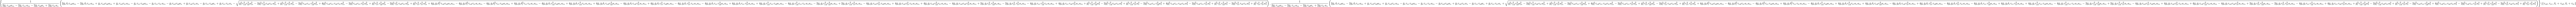

In [54]:
factor(solution)

In [ ]:
%store solution

In [ ]:
%store -r solution

In [ ]:
alpha_start

In [48]:
N(solution.subs(averageEstimateDict).subs({a_star:alpha_star.subs(averageEstimateDict), ai_star: I_alpha_star.subs(averageEstimateDict)}))

In [56]:
10.4315436555601 - 4.89

In [27]:
with open ("solution.pkl",'w') as f:
    pickle.dump(solution, f)

In [29]:
solution1 = solution.subs({e_d: rho_e*e_r, i_d: rho_i*i_r, g_i: P*g_e})

KeyboardInterrupt: 

In [28]:
simplify(solution)

KeyboardInterrupt: 

In [ ]:
t_star1 = simplify(cancel(expand(solution[0])))

In [ ]:
len(solution.args)

In [ ]:
t_star = simplify(cancel(expand(t_star.subs({e_d: (rho_e*e_r), i_d: (rho_i*i_r), g_i:P*g_e}))))

In [ ]:
t_star

In [ ]:
C.subs(t,t_star)

In [ ]:
C_prime.subs(t,t_star)

In [ ]:
N(solution.subs(averageEstimateDict))